In [1]:
import torch
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [38]:
def load_diabetes_dataset():
    # Load Diabetes dataset
    diabetes = load_diabetes()
    data = diabetes.data
    target = diabetes.target

    # Standardize the data
    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.float32)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1)

    train_inputs = torch.empty(0, data.shape[1], device=device)
    train_labels = torch.empty(0, dtype=torch.float32, device=device)
    test_inputs = torch.empty(0, data.shape[1], device=device)
    test_labels = torch.empty(0, dtype=torch.float32, device=device)

    # Concatenate all data into single tensors on the specified device
    for data, labels in tqdm(train_loader):
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in tqdm(test_loader):
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels.reshape(-1, 1)
    dataset['test_label'] = test_labels.reshape(-1, 1)

    return dataset

# Load the Diabetes dataset
dataset = load_diabetes_dataset()

100%|██████████| 89/89 [00:00<00:00, 3671.61it/s]


In [7]:
print("Train data shape: {}".format(dataset['train_input'].shape))
print("Train target shape: {}".format(dataset['train_label'].shape))
print("Test data shape: {}".format(dataset['test_input'].shape))
print("Test target shape: {}".format(dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([353, 10])
Train target shape: torch.Size([353, 1])
Test data shape: torch.Size([89, 10])
Test target shape: torch.Size([89, 1])


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.95e+01 | test_loss: 4.98e+01 | reg: 3.67e+02 | : 100%|█| 80/80 [00:01<00:00, 43.60it


saving model version 0.1


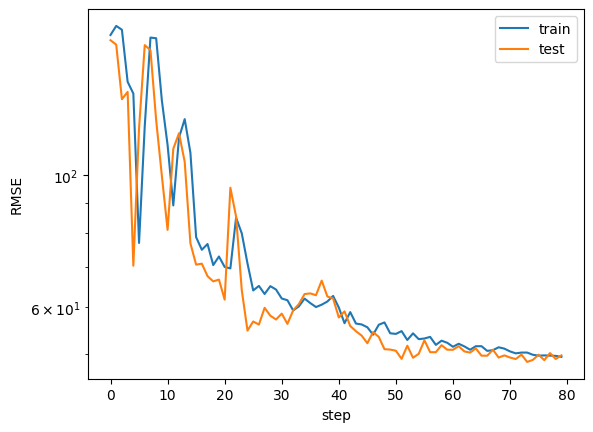

In [40]:
model = KAN(width=[10, 6, 3, 1], grid=3, k=3, seed=381, device=device)
results = model.fit(dataset, opt="Adam", steps=80, lamb=0.1, lamb_entropy=10.)

plt.plot(results['train_loss'])
plt.plot(results['test_loss'])
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

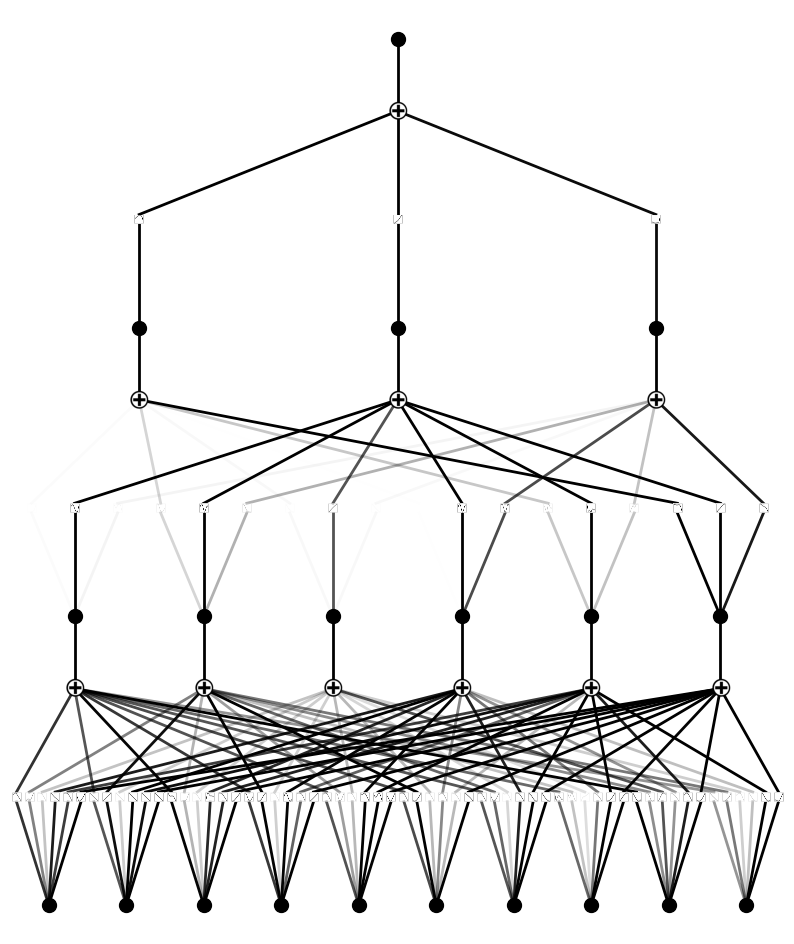

In [37]:
model.plot(beta=50, scale=1)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.95e+01 | test_loss: 6.32e+01 | reg: 5.78e+02 | : 100%|█| 30/30 [00:14<00:00,  2.00it

saving model version 0.1


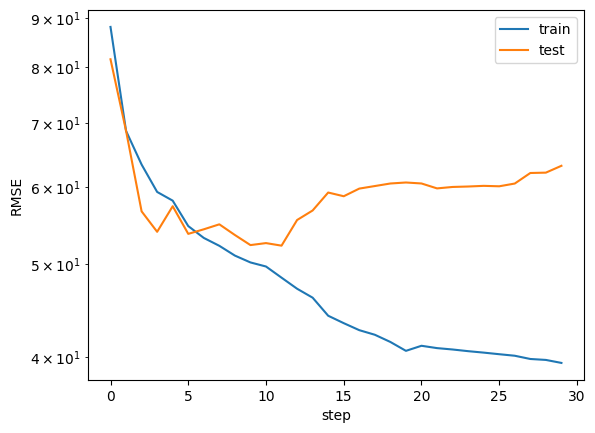

In [41]:
model = KAN(width=[10, [6,2], [4,1], 3, 1], grid=3, k=3, seed=23, device=device)
results = model.fit(dataset, opt="LBFGS", steps=30, lamb=0.1, lamb_entropy=10.)
plt.plot(results['train_loss'])
plt.plot(results['test_loss'])
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.34e+01 | test_loss: 5.36e+01 | reg: 9.00e+02 | : 100%|█| 80/80 [00:02<00:00, 29.85it


saving model version 0.1


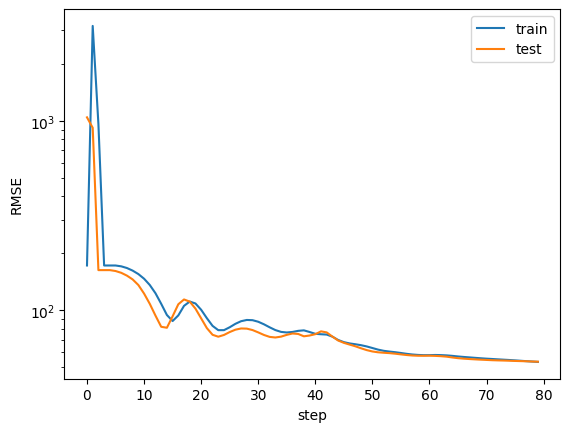

In [43]:
model = KAN(width=[10, [6,2], [4,1], 2, 1], grid=3, k=3, seed=23, device=device)
results = model.fit(dataset, opt="Adam", steps=80, lamb=0.1, lamb_entropy=10.)
plt.plot(results['train_loss'])
plt.plot(results['test_loss'])
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

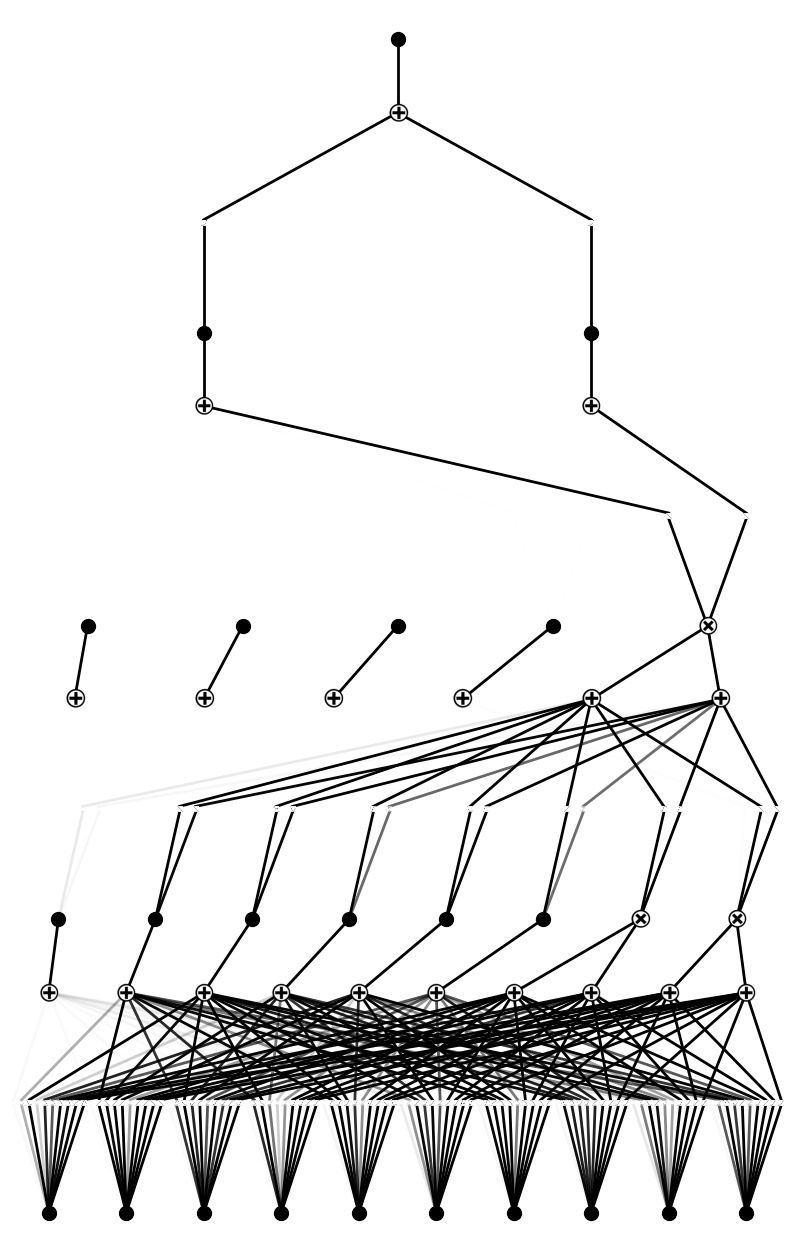

In [44]:
model.plot(beta=50, scale=1)

In [45]:
model = model.prune()

saving model version 0.2


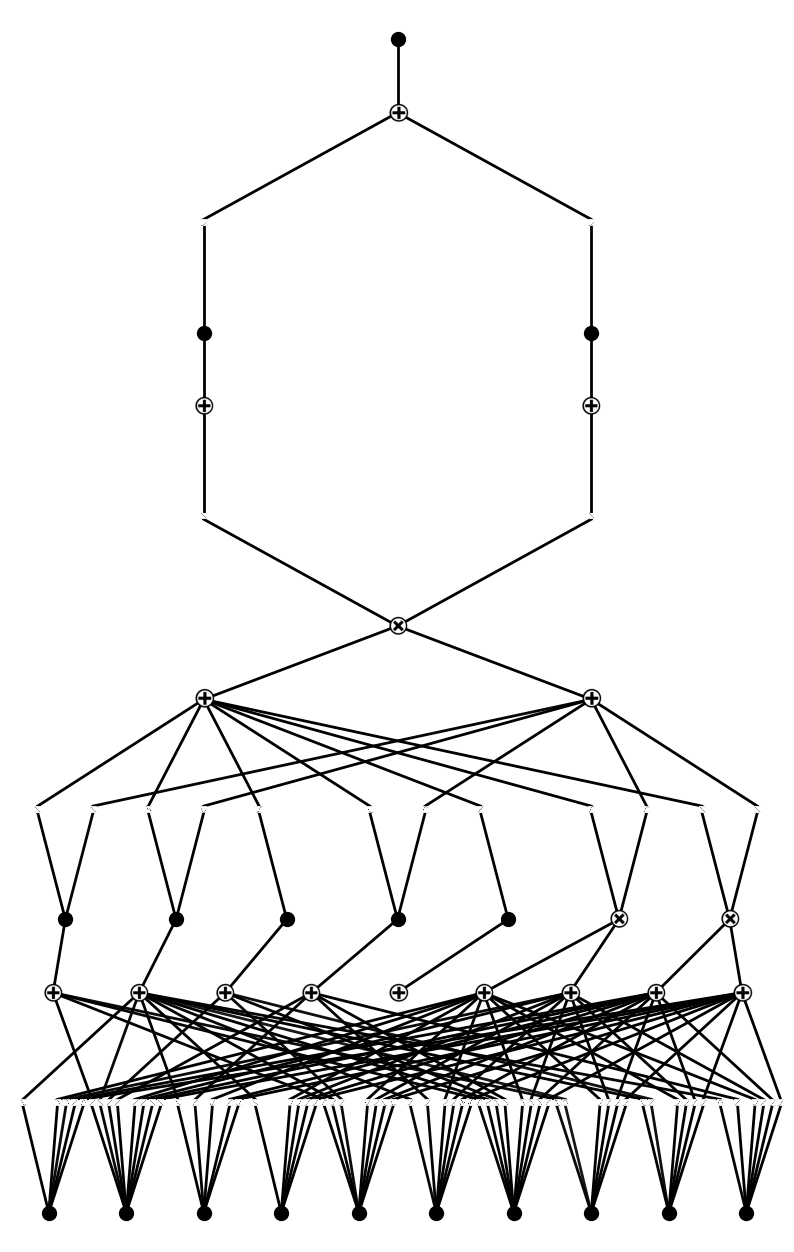

In [46]:
model.plot(beta=50, scale=1)

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 80/80 [00:12<00:00,  6.30it/s]


saving model version 0.3


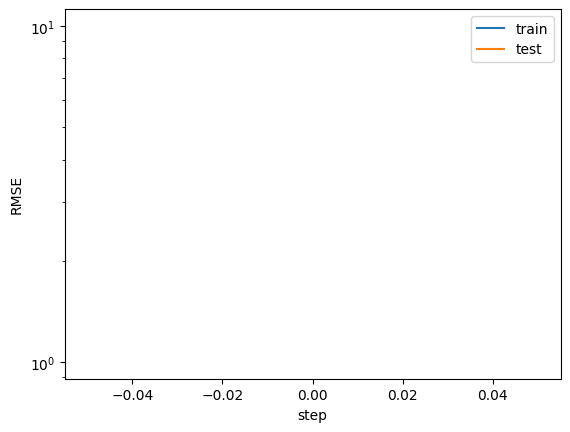

In [47]:
results = model.fit(dataset, opt="Adam", steps=80, lamb=0.1, lamb_entropy=10.)
plt.plot(results['train_loss'])
plt.plot(results['test_loss'])
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')